# Time Series Forecasting

### Using Machine Learning to Forecast Energy Consumption

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.head(10)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


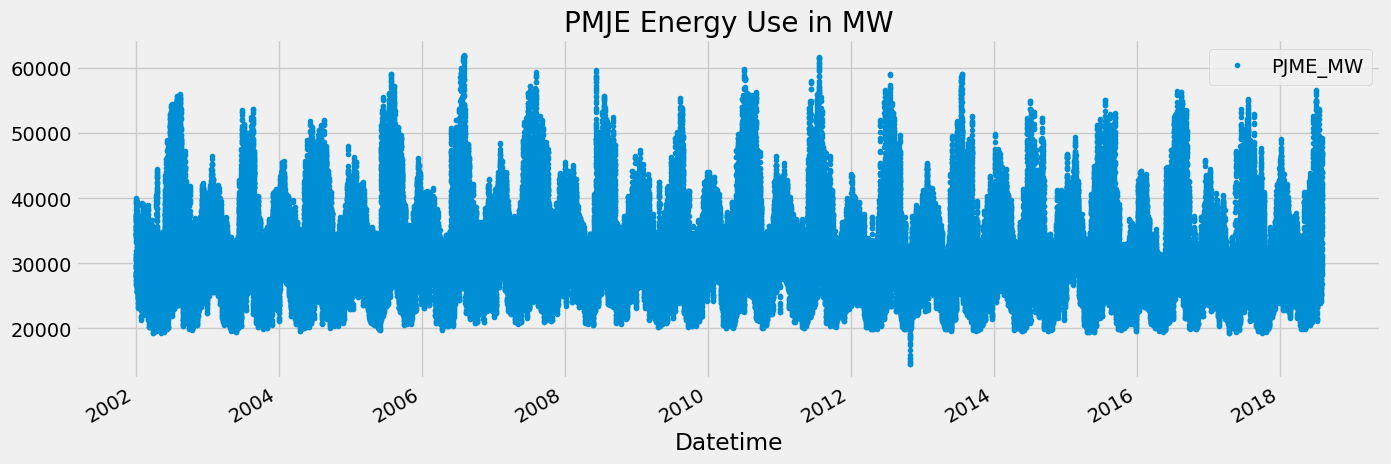

In [9]:
df.plot(style='.', 
        figsize=(15,5), 
        title= 'PMJE Energy Use in MW')

plt.show()

#### Train / Test Split

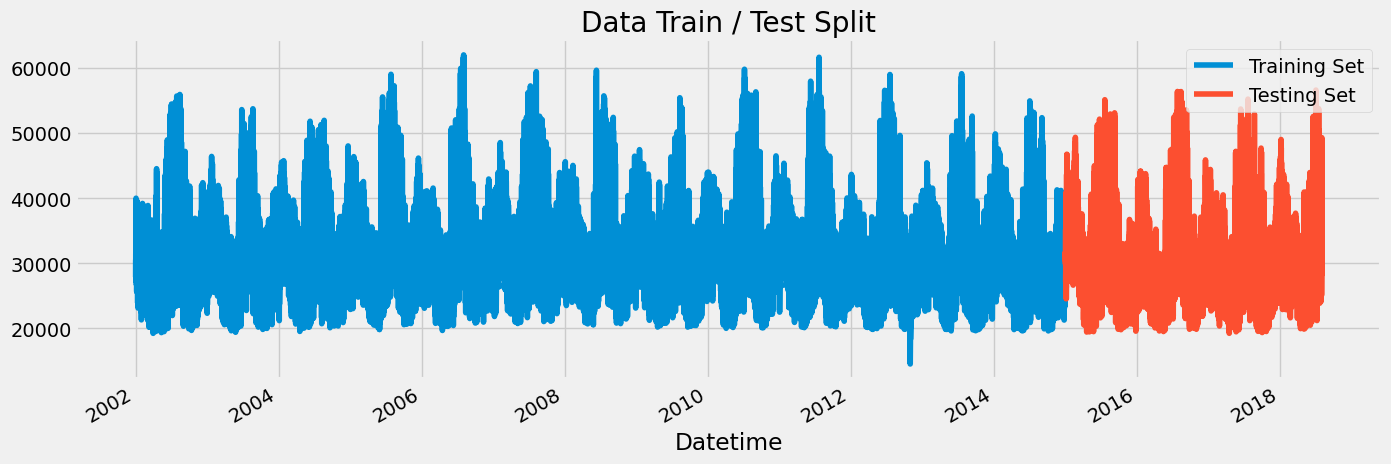

In [22]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

# plotting test / train split

fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax, label = 'Training Set', title='Data Train / Test Split')
test.plot(ax=ax, label = 'Test Set')
ax.legend(['Training Set','Testing Set'])

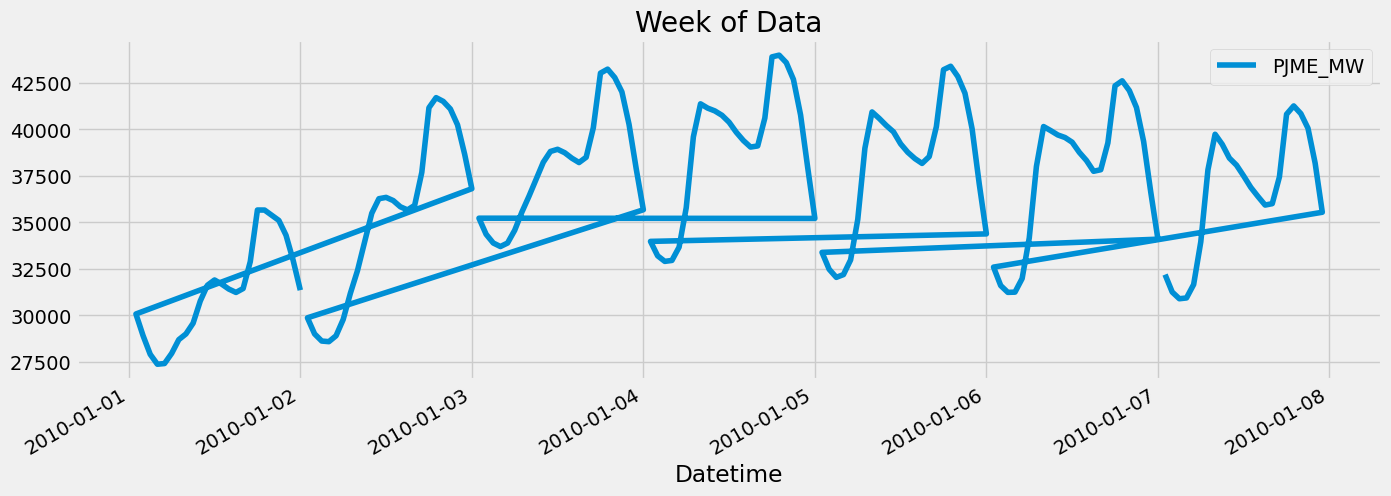

In [ ]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title='Week of Data')
plt.show()

#### Feature Creation

In [25]:
# creating time series features based on the time series index

def create_features(df):
    df = df.copy()
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [26]:
df = create_features(df)

#### Visulising Feature to Target Relationship

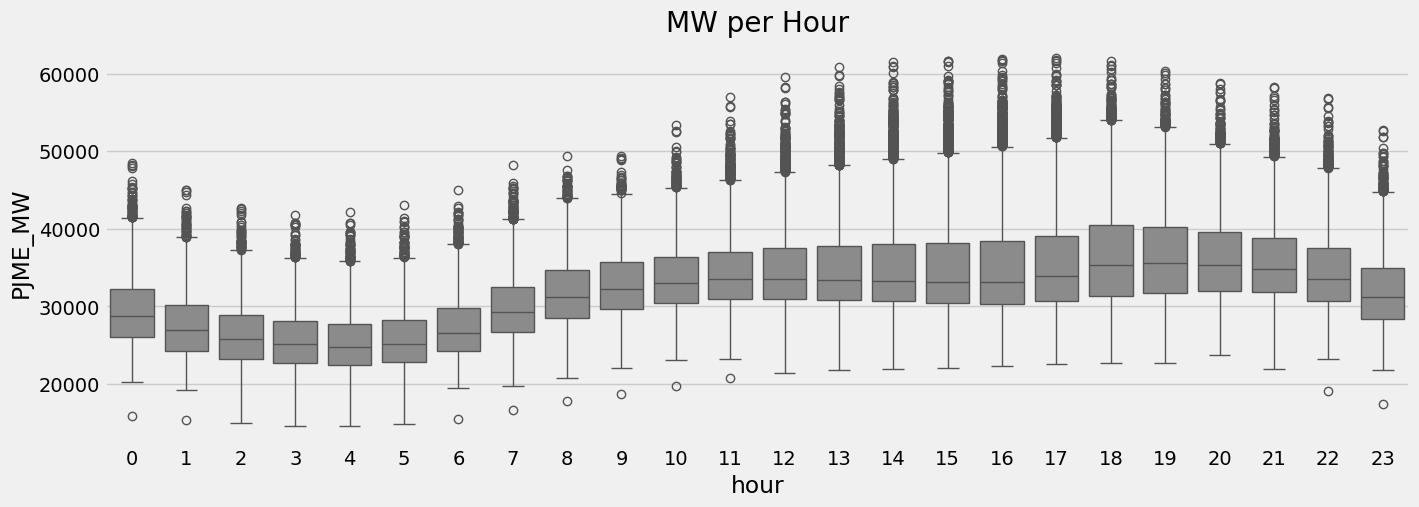

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x = 'hour', y='PJME_MW', palette='Blues')
ax.set_title("MW per Hour")
plt.show()


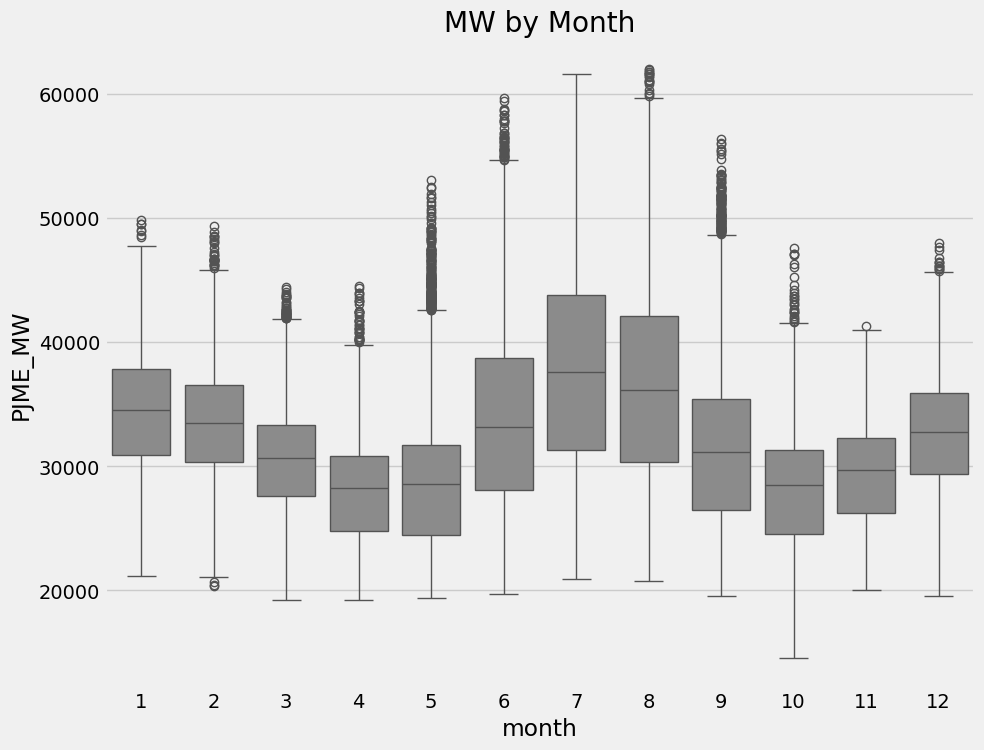

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()